# Forced Alignment with Wav2Vec2

In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
import IPython
import matplotlib.pyplot as plt


2.5.1
2.5.1
cpu


In [2]:
from torchaudio.transforms import Resample
waveform, sample_rate = torchaudio.load("data/sample3.mp3")

waveform = waveform[0:1]
resampler = Resample(orig_freq=sample_rate, new_freq=16000)
waveform = resampler(waveform)

In [3]:
from torchaudio.pipelines import MMS_FA as bundle

model = bundle.get_model()
model.to(device)

labels = bundle.get_labels()

In [4]:
emissions, _ = model(waveform.to(device))

In [5]:
emissions = torch.log_softmax(emissions, dim=-1)

In [6]:
emission = emissions[0].cpu().detach()

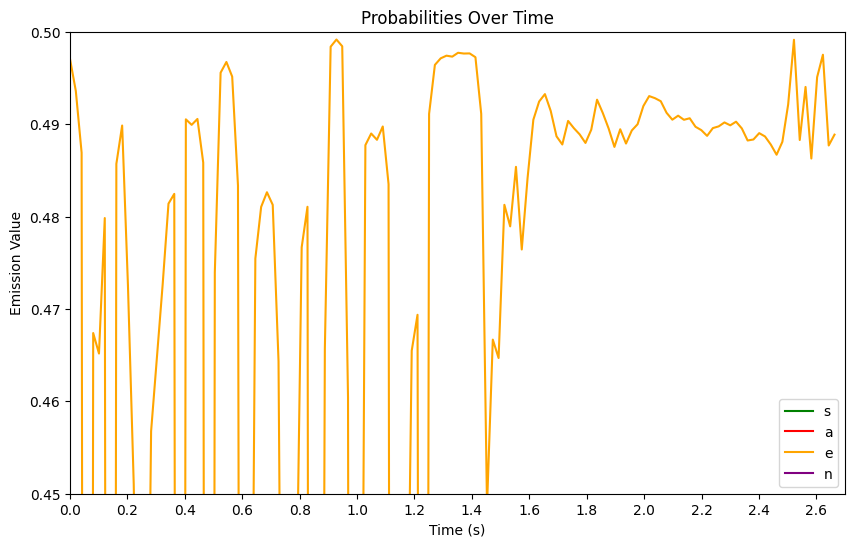

In [20]:
import matplotlib.pyplot as plt
import torch.nn.functional as F

probs = F.softmax(emission, dim=1)

# 计算 ratio
ratio = waveform.size(1) / emission.size()[0] / 16000

# 获取 x 轴数据
x_values = [i * ratio for i in range(probs.size()[0])]

# 获取 y 轴数据
y_values_8 = [probs[i][8] for i in range(probs.size()[0])]
y_values_1 = [probs[i][1] for i in range(probs.size()[0])]
y_values_4 = [probs[i][4] for i in range(probs.size()[0])]
y_values_3 = [probs[i][0] for i in range(probs.size()[0])]

# 创建图表
plt.figure(figsize=(10, 6))

# 绘制四条线
plt.plot(x_values, y_values_8, label='s', color='green')
plt.plot(x_values, y_values_1, label='a', color='red')
plt.plot(x_values, y_values_3, label='e', color='orange')
plt.plot(x_values, y_values_4, label='n', color='purple')

# 添加标题和标签
plt.title('Probabilities Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Emission Value')
import numpy as np
x_ticks = np.arange(0, 2.70, 0.2)
plt.xticks(x_ticks)
plt.xlim(0,2.7)

# 添加图例
plt.legend()

# 显示图表
plt.show()